Preparé par Dieng Babakar C14050

Importation des bibliothèques nécessaires

In [21]:
# Importation des bibliothèques pour l'analyse et la visualisation
import numpy as np               # Calcul numérique
import pandas as pd              # Manipulation de DataFrame
import matplotlib.pyplot as plt  # Tracés
import seaborn as sns            # Visualisations statistiques (facultatif mais pratique)

Uploader le fichier CSV dans Colab

In [6]:
from sklearn.datasets import fetch_california_housing

In [7]:
california = fetch_california_housing(as_frame=True)

In [8]:
df = california.frame

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# ***Data Cleaning***

# Vérification de la structure des données

In [13]:
# Affiche les dimensions du dataset :
# n = nombre d'observations
# d = nombre de variables
df.shape

(20640, 9)

On est dans un cadre n >> d, favorable à l’optimisation

In [14]:
# Affiche les types des variables et détecte les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Toutes les variables sont numériques, aucune variable catégorielle donc compatible avec moindre carrées et gradient et SGD/Adam.

# Statistiques descriptives

In [15]:
# Statistiques descriptives :
# moyenne, écart-type, min, max, quartiles
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Vérification des valeurs manquantes

In [16]:
# Vérifier l'existance des valeurs manquantes dans le dataset
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Le dataset ne contient pas des valeurs manquantes.

# Séparation des variables explicatives et de la cible

In [17]:
# X contient les variables explicatives
X = df.drop(columns='MedHouseVal')

# y contient la variable cible (valeur médiane des maisons)
y = df['MedHouseVal']

# Vérification des dimensions de X et y

In [18]:
# Vérifie la cohérence des dimensions
X.shape, y.shape

((20640, 8), (20640,))

# Standardisation des variables (CRUCIAL pour l’optimisation)

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialisation du standardiseur
scaler = StandardScaler()

# Standardisation des variables explicatives :
# moyenne = 0, écart-type = 1
X_scaled = scaler.fit_transform(X)

# Conversion en DataFrame pour conserver les noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
# La standardisation est indispensable pour les méthodes de gradient.
# Sans cela, les variables de grande échelle domineraient la descente de gradient,
# ce qui ralentirait la convergence et produirait des coefficients instables.

## 1) Visualisations exploratoires (EDA)

Objectif :
- comprendre la relation entre les variables explicatives et la cible `MedHouseVal`
- vérifier si l’hypothèse d’un modèle linéaire est raisonnable
- repérer la dispersion et les valeurs extrêmes (qui peuvent influencer l’optimisation)

Aperçu rapide : histogrammes (distributions)

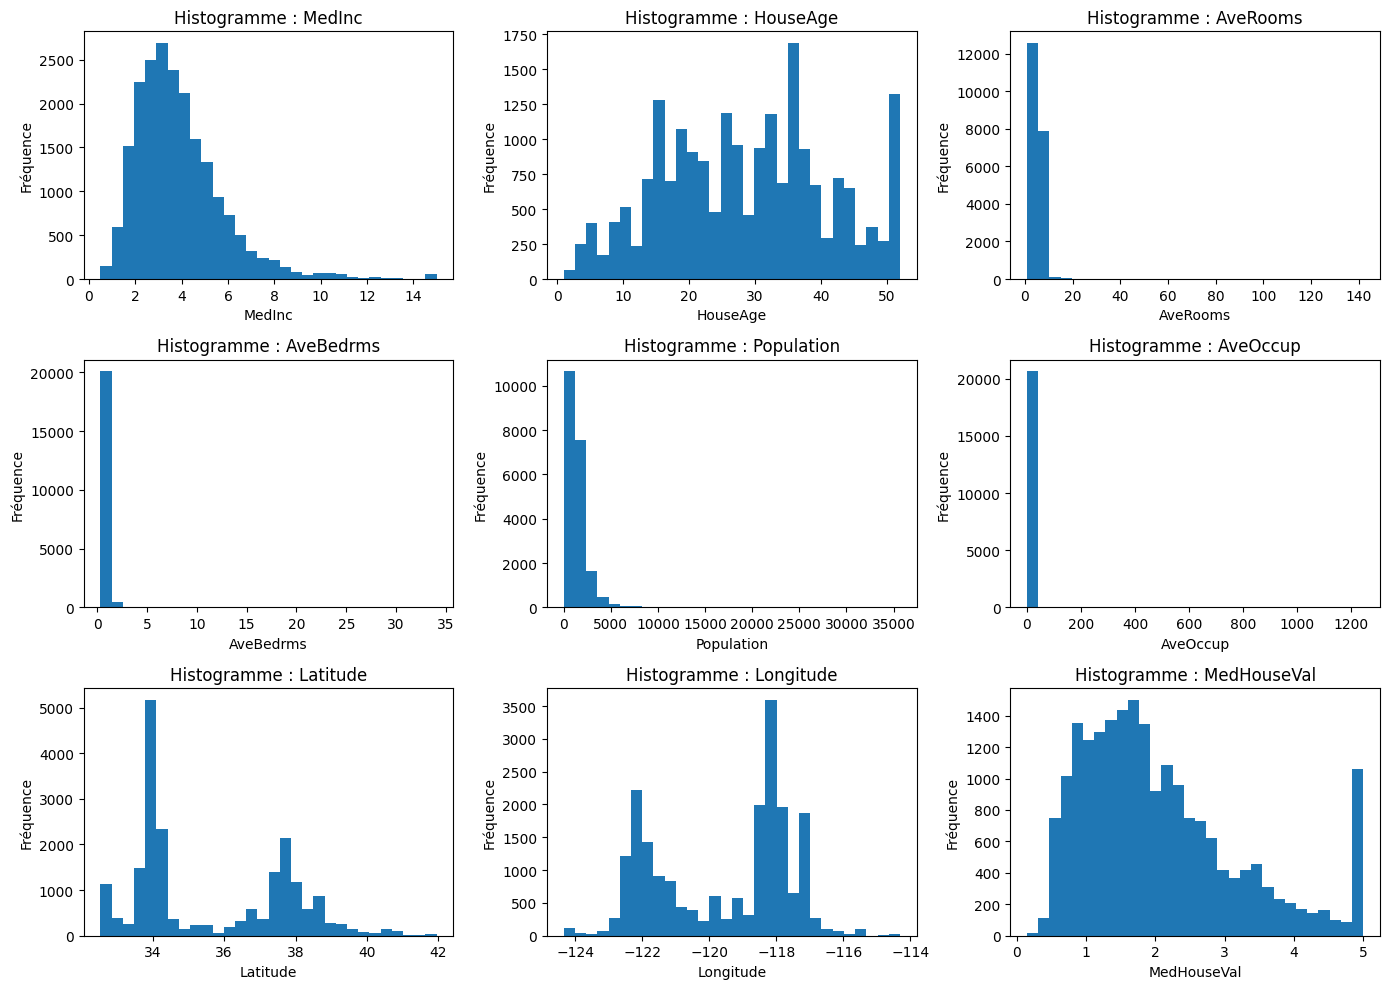

In [22]:
# Liste des colonnes (variables) du dataset
cols = df.columns.tolist()

# Création d'une figure pour afficher plusieurs histogrammes
plt.figure(figsize=(14, 10))

# Boucle sur toutes les colonnes pour tracer leur distribution
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)                  # Placement en grille 3x3
    plt.hist(df[col], bins=30)            # Histogramme (30 classes)
    plt.title(f"Histogramme : {col}")     # Titre du graphe
    plt.xlabel(col)                       # Nom de l'axe x
    plt.ylabel("Fréquence")               # Axe y = fréquence

# Ajuste automatiquement l'espacement entre les graphiques
plt.tight_layout()

# Affiche la figure
plt.show()

## 2) Nuages de points (X vs y)

On trace des nuages de points entre certaines variables explicatives et la cible.
Cela permet de visualiser si une relation linéaire est plausible et d'évaluer la dispersion.


Nuages de points essentiels

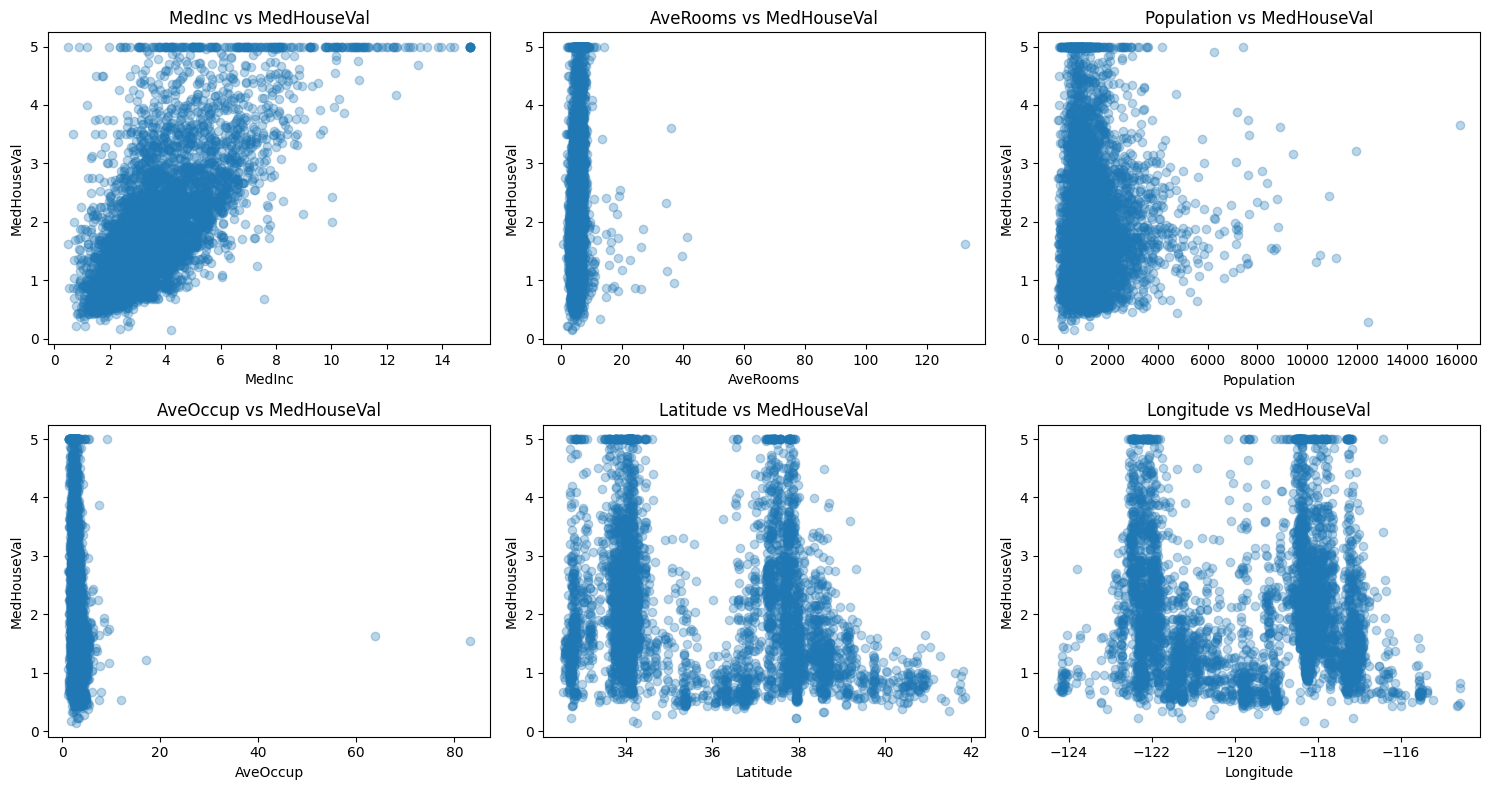

In [27]:
# Liste des variables explicatives à visualiser
features = [
    "MedInc",
    "AveRooms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude"
]

# Taille de l'échantillon pour accélérer l'affichage
sample_size = 5000

# Échantillonnage aléatoire (reproductible)
df_plot = df.sample(n=sample_size, random_state=42)

# Création de la figure avec une grille de subplots (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Aplatissement de la matrice d'axes pour itérer facilement
axes = axes.flatten()

# Boucle sur les variables explicatives
for i, feature in enumerate(features):
    # Sélection du subplot courant
    ax = axes[i]

    # Tracé du nuage de points
    ax.scatter(
        df_plot[feature],          # variable explicative
        df_plot["MedHouseVal"],    # variable cible
        alpha=0.3                  # transparence pour voir la densité
    )

    # Titres et labels
    ax.set_title(f"{feature} vs MedHouseVal")
    ax.set_xlabel(feature)
    ax.set_ylabel("MedHouseVal")

# Ajustement automatique des espacements
plt.tight_layout()

# Affichage de la figure
plt.show()

### Observations :
- `MedInc` montre généralement une relation positive avec `MedHouseVal` (tendance croissante).
- Certaines variables (`Population`, `AveOccup`, `AveRooms`) peuvent contenir des valeurs extrêmes,
  ce qui peut influencer les coefficients du modèle et la convergence.
- `Latitude` et `Longitude` suggèrent un effet de localisation (relation non strictement linéaire).


Heatmap de corrélation

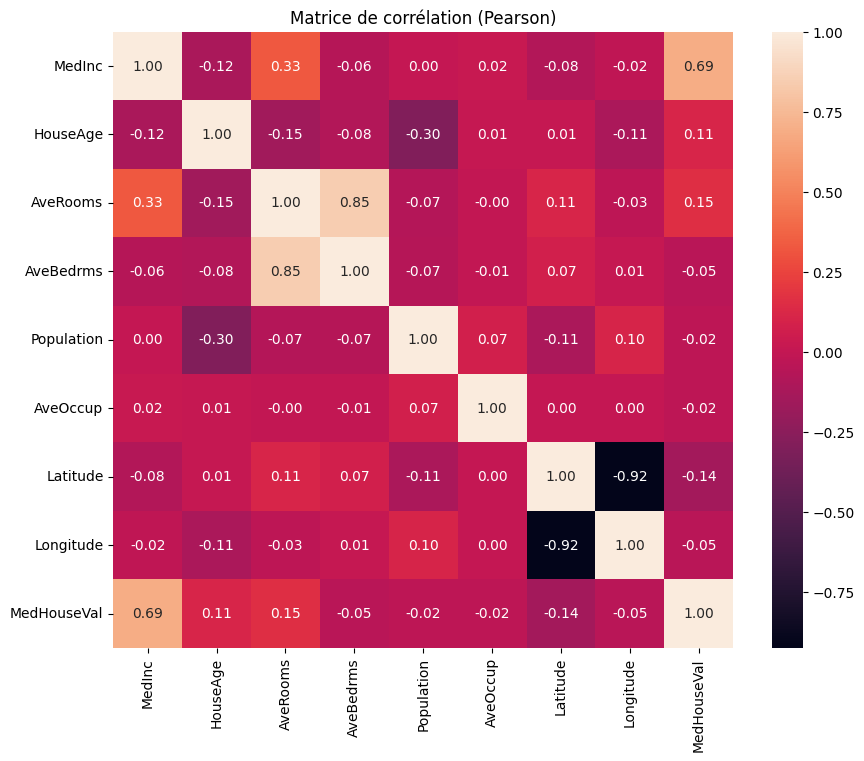

In [25]:
# Calcul de la matrice de corrélation (Pearson)
corr = df.corr(numeric_only=True)

# Création de la figure
plt.figure(figsize=(10, 8))

# Affichage sous forme de heatmap
sns.heatmap(corr, annot=True, fmt=".2f")   # annot=True affiche les valeurs

# Titre
plt.title("Matrice de corrélation (Pearson)")

# Affichage
plt.show()

Interprétation rapide de la corrélation avec la cible

In [26]:
# Corrélation de chaque variable avec la cible
corr_target = corr["MedHouseVal"].sort_values(ascending=False)

# Affiche la corrélation triée
corr_target

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


## Synthèse et transition vers la modélisation

Les étapes de nettoyage et de visualisation ont permis de mieux comprendre la structure
du jeu de données California Housing. Le dataset ne contient aucune valeur manquante
et toutes les variables sont numériques, ce qui permet une application directe des
méthodes d’optimisation.

L’analyse descriptive a mis en évidence des différences d’échelle importantes entre
les variables explicatives ainsi que la présence de valeurs extrêmes pour certaines
d’entre elles (notamment `Population`, `AveRooms` et `AveOccup`). Ces caractéristiques
peuvent avoir un impact significatif sur la convergence des méthodes de gradient, ce
qui justifie l’étape de standardisation des variables.

Les visualisations exploratoires, en particulier les nuages de points, suggèrent
qu’une relation globalement croissante existe entre certaines variables (comme `MedInc`)
et la variable cible `MedHouseVal`, rendant l’hypothèse d’un modèle linéaire raisonnable
comme première approximation. Toutefois, la dispersion observée et l’influence possible
des valeurs extrêmes laissent présager des difficultés dans l’estimation des coefficients.

Dans la suite, le problème est formulé comme un problème d’optimisation correspondant
à une régression linéaire avec une fonction de coût quadratique. Les modèles seront
implémentés manuellement afin d’étudier le comportement des méthodes de gradient, avant
d’introduire des techniques de régularisation pour améliorer la stabilité du modèle.



## Formulation mathématique du problème

On considère un jeu de données composé de :
- une matrice des variables explicatives X ∈ R^{n × d},
- un vecteur cible y ∈ R^{n}.

L’objectif de la régression linéaire est de déterminer un vecteur de paramètres
w ∈ R^{d} tel que la prédiction linéaire Xw soit aussi proche que possible de y.

Le problème est formulé comme un problème d’optimisation sans contrainte
minimisant l’erreur quadratique moyenne :

$$
J(w) = \frac{1}{2n} \|Xw - y\|^2
$$

Le but est donc de résoudre :

$$
\min_w \; J(w)
$$

Cette fonction de coût est convexe, ce qui garantit l’existence d’un minimum global unique.


# Préparation des matrices pour l’optimisation

In [28]:
# Conversion des données en tableaux NumPy pour les calculs numériques
X_np = X_scaled.values    # Matrice des variables explicatives standardisées
y_np = y.values           # Vecteur cible

# Récupération des dimensions du problème
n, d = X_np.shape         # n = nombre d'observations, d = nombre de variables

# Implémentation manuelle de la fonction de coût (MSE)

In [29]:
def cost_function(w, X, y):
    """
    Fonction de coût quadratique (Mean Squared Error).

    Paramètres :
    w : vecteur des paramètres (d,)
    X : matrice des données (n, d)
    y : vecteur cible (n,)

    Retour :
    J(w) : valeur du coût
    """
    # Calcul des prédictions du modèle linéaire
    y_pred = X @ w                     # produit matriciel Xw

    # Calcul du vecteur des erreurs
    errors = y_pred - y                # différence entre prédictions et valeurs réelles

    # Calcul du coût quadratique
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)

    return cost

# Test de la fonction de coût

In [30]:
# Initialisation aléatoire du vecteur des paramètres
w_init = np.random.randn(d)

# Calcul du coût initial
initial_cost = cost_function(w_init, X_np, y_np)

initial_cost

np.float64(4.513692479810712)

La valeur initiale de la fonction de coût est relativement élevée.
Cela est normal car le vecteur des paramètres w est initialisé aléatoirement.
À ce stade, le modèle ne capture aucune structure des données.
L’objectif de la descente de gradient sera de réduire progressivement cette valeur.


## Calcul du gradient (∇J(w))

On rappelle la fonction de coût de la régression linéaire (erreur quadratique moyenne) :

$$
J(w) = \frac{1}{2n}\|Xw - y\|^2
$$

où :
- X ∈ R^{n x d} est la matrice des variables explicatives,
- y ∈ R^{n} est le vecteur cible,
- w ∈ R^{d} est le vecteur de paramètres.

Le gradient de \(J(w)\) par rapport à \(w\) est donné par :

$$
\nabla J(w) = \frac{1}{n}X^T(Xw - y)
$$

Interprétation :
- le gradient indique la direction dans laquelle le coût augmente le plus rapidement,
La descente de gradient utilise la direction opposée au gradient,
notée -grad J(w), afin de diminuer la valeur de la fonction de coût.


In [32]:
# Implémentation du gradient de la fonction de coût J(w)


def gradient(w, X, y):
    """
    Gradient de la fonction de coût quadratique :
        J(w) = (1/(2n)) * ||Xw - y||^2

    Formule du gradient :
        ∇J(w) = (1/n) * X^T (Xw - y)

    Paramètres :
    w : vecteur des paramètres (d,)
    X : matrice des données (n, d)
    y : vecteur cible (n,)

    Retour :
    grad : gradient (d,)
    """
    # Récupère le nombre d'observations n
    n = len(y)

    # Calcule les prédictions du modèle linéaire : y_pred = Xw
    y_pred = X @ w

    # Calcule les erreurs : (Xw - y)
    errors = y_pred - y

    # Calcule le gradient : (1/n) * X^T (Xw - y)
    grad = (1 / n) * (X.T @ errors)

    # Retourne le gradient
    return grad

In [33]:
# Test rapide du gradient (simple vérification)


# Initialise un vecteur de paramètres aléatoire
w_test = np.random.randn(d)

# Calcule le gradient pour ce vecteur
grad_test = gradient(w_test, X_np, y_np)

# Affiche la dimension du gradient (doit être (d,))
grad_test.shape

(8,)

### Remarque importante

Le gradient calculé est un vecteur de dimension (8,),
ce qui correspond exactement au nombre de variables explicatives.
Chaque composante du gradient indique comment ajuster le paramètre
associé afin de diminuer la valeur de la fonction de coût.
. Dans l'étape suivante (descente de gradient), on mettra
à jour les paramètres en soustrayant un multiple du gradient :

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla J(w^{(k)})
$$

où alpha > 0 est le pas d’apprentissage (learning rate).


## Descente de gradient (batch)

La descente de gradient est un algorithme itératif permettant de résoudre
le problème d’optimisation associé à la régression linéaire.

À partir d’un vecteur initial de paramètres w⁽⁰⁾, l’algorithme met à jour
les paramètres selon la règle suivante :

$$
w^{(k+1)} = w^{(k)} - \alpha \; \nabla J(w^{(k)})
$$

où :
- J(w) est la fonction de coût quadratique,
- grad J(w) est le gradient de J par rapport à w,
- alpha > 0 est le pas d’apprentissage (learning rate).

Cette mise à jour est répétée jusqu’à convergence, c’est-à-dire jusqu’à ce
que la fonction de coût cesse de diminuer de manière significative.


# Implémentation de la descente de gradient (batch)

In [34]:
# -------------------------------------------------------------------
# Implémentation de la descente de gradient (batch)
# -------------------------------------------------------------------

def gradient_descent(X, y, alpha=0.01, n_iterations=1000):
    """
    Descente de gradient pour la régression linéaire.

    Paramètres :
    X : matrice des données (n, d)
    y : vecteur cible (n,)
    alpha : pas d'apprentissage
    n_iterations : nombre d'itérations

    Retour :
    w : vecteur final des paramètres
    cost_history : liste des valeurs de la fonction de coût
    """
    # Récupération des dimensions
    n, d = X.shape

    # Initialisation aléatoire des paramètres
    w = np.random.randn(d)

    # Liste pour stocker l'évolution du coût
    cost_history = []

    # Boucle principale de la descente de gradient
    for i in range(n_iterations):
        # Calcul du gradient au point courant
        grad = gradient(w, X, y)

        # Mise à jour des paramètres selon la règle de descente de gradient
        w = w - alpha * grad

        # Calcul du coût après la mise à jour
        cost = cost_function(w, X, y)

        # Stockage du coût
        cost_history.append(cost)

    # Retourne les paramètres optimisés et l'historique du coût
    return w, cost_history


# Lancement de la descente de gradient

In [35]:
# Choix du pas d'apprentissage
alpha = 0.01

# Nombre d'itérations
n_iterations = 1000

# Exécution de la descente de gradient
w_gd, cost_history = gradient_descent(
    X_np,
    y_np,
    alpha=alpha,
    n_iterations=n_iterations
)

# Affichage du coût final
cost_history[-1]

np.float64(2.414830078323366)

La valeur finale de la fonction de coût est d’environ 2.41, contre une valeur initiale
d’environ 4.51. Cette diminution significative confirme que l’algorithme de descente
de gradient a permis d’améliorer l’ajustement du modèle aux données.


La convergence observée indique que le pas d’apprentissage choisi est adapté
et que l’algorithme progresse dans la bonne direction.


# Courbe de convergence (coût vs itérations)

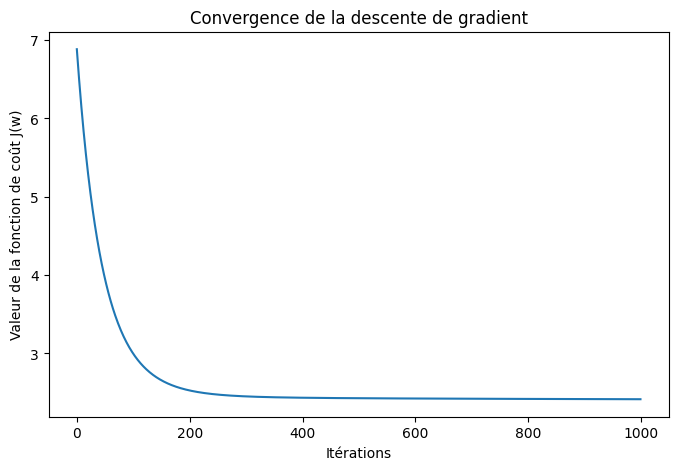

In [36]:
# Création de la figure
plt.figure(figsize=(8, 5))

# Tracé de l'évolution du coût
plt.plot(cost_history)

# Titres et labels
plt.title("Convergence de la descente de gradient")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction de coût J(w)")

# Affichage
plt.show()

### Commentaires

La courbe de convergence montre que la fonction de coût diminue
progressivement au fil des itérations, ce qui confirme que la descente
de gradient permet de résoudre le problème d’optimisation.

Le choix du pas d’apprentissage alpha est crucial :
- un alpha trop grand peut entraîner des oscillations ou une divergence,
- un alpha trop petit conduit à une convergence très lente.

Dans la suite, on s’intéressera aux valeurs des coefficients obtenus et
à leur stabilité, avant d’introduire une régularisation de type Ridge.


## Analyse des coefficients du modèle linéaire

Après l’optimisation par descente de gradient, on analyse les valeurs des
coefficients estimés. Ces coefficients représentent l’influence de chaque
variable explicative sur la variable cible.

Une attention particulière est portée à l’amplitude des coefficients,
car des valeurs très élevées peuvent indiquer une instabilité du modèle
et une forte sensibilité aux données.



### Récapitulatif des coefficients estimés

In [37]:
# Création d'un DataFrame pour associer chaque coefficient à sa variable
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": w_gd
})

# Affichage des coefficients
coefficients

,Variable,Coefficient
0,MedInc,0.896657
1,HouseAge,0.176466
2,AveRooms,-0.309376
3,AveBedrms,0.306087
4,Population,0.016390
5,AveOccup,-0.045804
6,Latitude,-0.425177
7,Longitude,-0.399701


L’analyse des coefficients montre que le revenu médian (`MedInc`) est la variable
la plus influente dans la prédiction de la valeur des logements, ce qui est cohérent
avec les observations issues de l’analyse exploratoire. Les variables géographiques
(`Latitude`, `Longitude`) présentent également un impact non négligeable.

Cependant, certaines variables corrélées présentent des coefficients de signe opposé
et d’amplitude comparable, ce qui peut indiquer une instabilité du modèle. De plus,
l’absence de contrainte sur les coefficients peut rendre le modèle sensible aux valeurs
extrêmes et aux variations des données.


### Ajout de la valeur absolue des coefficients

In [38]:
# Ajout de la valeur absolue des coefficients
coefficients["Abs_Coefficient"] = np.abs(coefficients["Coefficient"])

# Tri des coefficients par ordre décroissant de leur valeur absolue
coefficients_sorted = coefficients.sort_values(
    by="Abs_Coefficient",
    ascending=False
)

# Affichage
coefficients_sorted

,Variable,Coefficient,Abs_Coefficient
0,MedInc,0.896657,0.896657
6,Latitude,-0.425177,0.425177
7,Longitude,-0.399701,0.399701
2,AveRooms,-0.309376,0.309376
3,AveBedrms,0.306087,0.306087
1,HouseAge,0.176466,0.176466
5,AveOccup,-0.045804,0.045804
4,Population,0.016390,0.016390


Cette vue permet d’identifier les variables qui dominent le modèle.


# Visualisation des coefficients

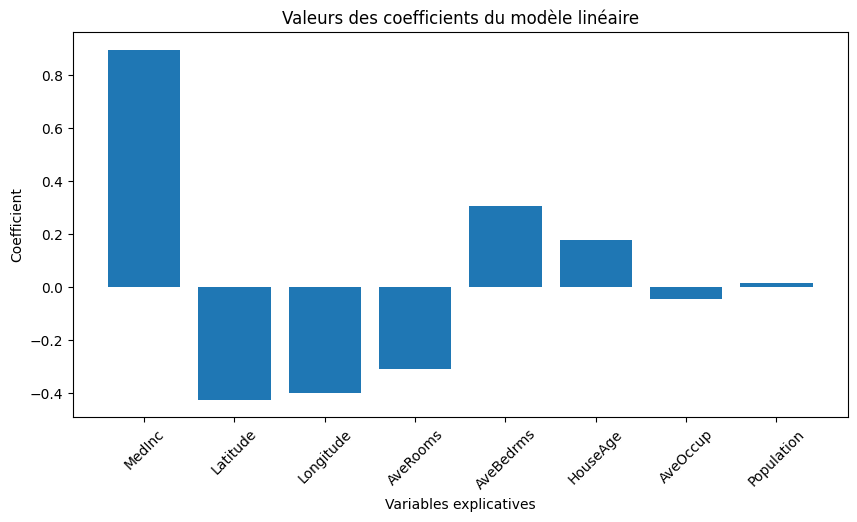

In [39]:
# Création de la figure
plt.figure(figsize=(10, 5))

# Diagramme en barres des coefficients
plt.bar(coefficients_sorted["Variable"], coefficients_sorted["Coefficient"])

# Rotation des noms de variables pour une meilleure lisibilité
plt.xticks(rotation=45)

# Titres et labels
plt.title("Valeurs des coefficients du modèle linéaire")
plt.xlabel("Variables explicatives")
plt.ylabel("Coefficient")

# Affichage
plt.show()

### Interprétation de la visualisation des coefficients

La figure représente les coefficients estimés par le modèle de régression linéaire
après l’optimisation par descente de gradient. Comme les variables explicatives ont
été standardisées, les coefficients sont directement comparables entre eux.

On observe que :
- `MedInc` possède le coefficient positif le plus élevé, ce qui confirme que le
  revenu médian est le facteur le plus influent dans la prédiction de la valeur
  des logements.
- Les variables géographiques (`Latitude` et `Longitude`) ont des coefficients
  négatifs d’amplitude relativement importante, indiquant un effet significatif
  de la localisation.
- `AveRooms` et `AveBedrms` présentent des coefficients de signe opposé et d’amplitude
  comparable, ce qui peut refléter une corrélation entre ces variables.
- `Population` et `AveOccup` ont des coefficients proches de zéro, suggérant une
  contribution limitée dans le cadre de ce modèle linéaire.


Cette visualisation met en évidence une forte disparité dans l’amplitude des
coefficients. Bien que le modèle converge et fournisse des coefficients interprétables,
l’absence de contrainte sur les paramètres peut conduire à des estimations sensibles
aux données et potentiellement instables.


Afin de limiter l’amplitude des coefficients et d’améliorer la stabilité du modèle,
on introduit dans la suite une régularisation de type Ridge. Cette approche consiste
à pénaliser les coefficients de grande taille lors de l’optimisation, tout en conservant
le cadre de la régression linéaire.


## Régularisation Ridge

L’analyse précédente a montré que, bien que la régression linéaire permette
d’obtenir un modèle convergent, certains coefficients peuvent présenter une
amplitude relativement élevée. Cela peut rendre le modèle sensible aux données
et moins stable.

La régularisation Ridge consiste à modifier la fonction de coût en ajoutant
un terme de pénalisation sur la norme des coefficients. L’objectif est de
contraindre les coefficients à rester de taille raisonnable tout en conservant
un bon ajustement aux données.


### Nouvelle fonction de coût (Ridge)

### Fonction de coût régularisée (Ridge)

La fonction de coût Ridge est définie par :

$$
J_{\lambda}(w) = \frac{1}{2n} \|Xw - y\|^2 + \lambda \|w\|^2
$$

où :
- le premier terme mesure l’erreur d’ajustement du modèle,
- le second terme pénalise les coefficients de grande amplitude,
- lambda ≥ 0 est le paramètre de régularisation.

Lorsque lambda = 0, on retrouve la régression linéaire classique.
Lorsque lambda augmente, les coefficients sont davantage contraints.


### Gradient de la fonction de coût Ridge

Le gradient de la fonction de coût Ridge par rapport à w s’écrit :

$$
\text{grad } J_{\lambda}(w) =
\frac{1}{n} X^T (Xw - y) + 2 \lambda w
$$

Le terme supplémentaire 2·lambda·w pousse les coefficients vers zéro,
ce qui améliore la stabilité du modèle.


### Implémentation manuelle du gradient Ridge

In [40]:
# -------------------------------------------------------------------
# Gradient de la fonction de coût Ridge
# -------------------------------------------------------------------

def ridge_gradient(w, X, y, lambda_):
    """
    Gradient de la fonction de coût Ridge :
        J(w) = (1/(2n)) * ||Xw - y||^2 + lambda * ||w||^2

    Paramètres :
    w : vecteur des paramètres (d,)
    X : matrice des données (n, d)
    y : vecteur cible (n,)
    lambda_ : paramètre de régularisation

    Retour :
    grad : gradient Ridge (d,)
    """
    # Nombre d'observations
    n = len(y)

    # Prédictions du modèle
    y_pred = X @ w

    # Erreurs
    errors = y_pred - y

    # Gradient du terme d'erreur quadratique
    grad_mse = (1 / n) * (X.T @ errors)

    # Gradient du terme de régularisation
    grad_reg = 2 * lambda_ * w

    # Gradient total
    grad = grad_mse + grad_reg

    return grad

### Descente de gradient Ridge (implémentation complète)

In [41]:
# -------------------------------------------------------------------
# Descente de gradient pour la régression Ridge
# -------------------------------------------------------------------

def ridge_gradient_descent(X, y, alpha=0.01, lambda_=0.1, n_iterations=1000):
    """
    Descente de gradient pour la régression Ridge.

    Paramètres :
    X : matrice des données (n, d)
    y : vecteur cible (n,)
    alpha : pas d'apprentissage
    lambda_ : paramètre de régularisation
    n_iterations : nombre d'itérations

    Retour :
    w : vecteur final des paramètres
    cost_history : historique du coût Ridge
    """
    # Dimensions du problème
    n, d = X.shape

    # Initialisation aléatoire des paramètres
    w = np.random.randn(d)

    # Historique du coût
    cost_history = []

    # Boucle de descente de gradient
    for i in range(n_iterations):
        # Calcul du gradient Ridge
        grad = ridge_gradient(w, X, y, lambda_)

        # Mise à jour des paramètres
        w = w - alpha * grad

        # Calcul du coût Ridge
        mse_term = (1 / (2 * n)) * np.sum((X @ w - y) ** 2)
        reg_term = lambda_ * np.sum(w ** 2)
        cost = mse_term + reg_term

        # Stockage du coût
        cost_history.append(cost)

    return w, cost_history

# Lancement de Ridge et comparaison

In [42]:
# Choix du paramètre de régularisation
lambda_ = 0.1

# Exécution de la descente de gradient Ridge
w_ridge, cost_history_ridge = ridge_gradient_descent(
    X_np,
    y_np,
    alpha=0.01,
    lambda_=lambda_,
    n_iterations=1000
)

# Affichage du coût final Ridge
cost_history_ridge[-1]

np.float64(2.506302800810351)

La valeur finale de la fonction de coût Ridge est légèrement supérieure à celle
obtenue sans régularisation. Cette augmentation est attendue, car la fonction de
coût Ridge inclut un terme de pénalisation des coefficients.

Cette pénalisation permet de limiter l’amplitude des coefficients et d’améliorer
la stabilité du modèle, au prix d’un ajustement légèrement moins précis aux données
d’apprentissage.

Cette observation illustre le compromis biais–variance introduit par la
régularisation Ridge.


## Comparaison avant / après régularisation Ridge

L’objectif de cette section est de comparer la régression linéaire classique
(sans régularisation) et la régression Ridge, afin d’évaluer l’impact de la
régularisation sur :
- l’amplitude des coefficients,
- la stabilité du modèle,
- le comportement de la convergence.


### Tableau comparatif des coefficients


In [43]:
# Création d'un tableau comparatif des coefficients
comparison = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient_sans_Ridge": w_gd,
    "Coefficient_Ridge": w_ridge
})

# Ajout des valeurs absolues pour faciliter la comparaison
comparison["Abs_sans_Ridge"] = np.abs(comparison["Coefficient_sans_Ridge"])
comparison["Abs_Ridge"] = np.abs(comparison["Coefficient_Ridge"])

# Affichage du tableau
comparison

,Variable,Coefficient_sans_Ridge,Coefficient_Ridge,Abs_sans_Ridge,Abs_Ridge
0,MedInc,0.896657,0.658968,0.896657,0.658968
1,HouseAge,0.176466,0.156369,0.176466,0.156369
2,AveRooms,-0.309376,0.000304,0.309376,0.000304
3,AveBedrms,0.306087,0.010852,0.306087,0.010852
4,Population,0.016390,0.010190,0.016390,0.010190
5,AveOccup,-0.045804,-0.034617,0.045804,0.034617
6,Latitude,-0.425177,-0.239302,0.425177,0.239302
7,Longitude,-0.399701,-0.197800,0.399701,0.197800


La comparaison des coefficients avant et après régularisation Ridge montre
une diminution systématique de leur amplitude. Les variables les plus
importantes dans le modèle non régularisé conservent leur influence relative,
mais avec des valeurs plus modérées.

On observe en particulier que les coefficients associés à `AveRooms` et
`AveBedrms`, de signe opposé et d’amplitude comparable dans le modèle sans
régularisation, sont fortement réduits après l’introduction de Ridge. Ce
comportement est caractéristique de la régularisation Ridge en présence de
variables corrélées.

Ainsi, la régularisation permet de stabiliser le modèle tout en préservant
les informations essentielles contenues dans les données.


### Visualisation des coefficients (avant / après Ridge)


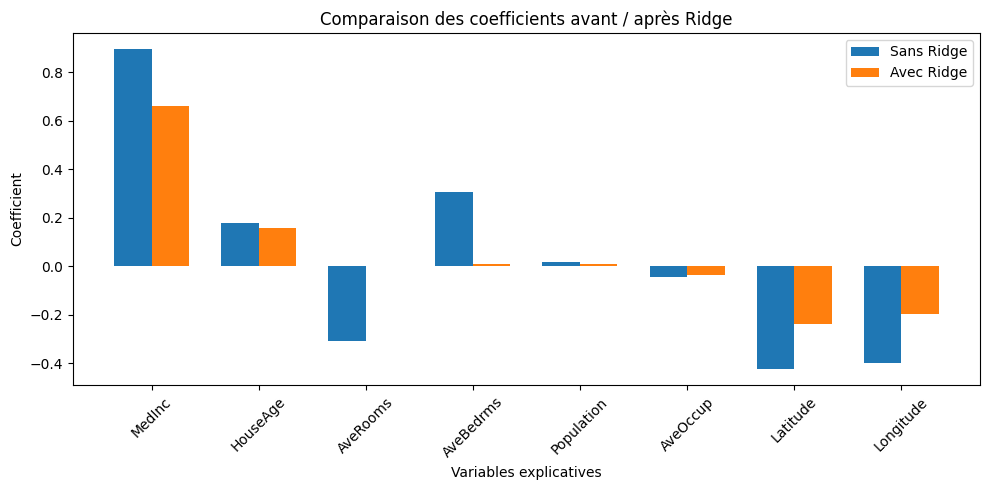

In [44]:
# Création de la figure
plt.figure(figsize=(10, 5))

# Position des barres sur l'axe des x
x = np.arange(len(X.columns))
width = 0.35

# Barres sans régularisation
plt.bar(
    x - width/2,
    comparison["Coefficient_sans_Ridge"],
    width,
    label="Sans Ridge"
)

# Barres avec Ridge
plt.bar(
    x + width/2,
    comparison["Coefficient_Ridge"],
    width,
    label="Avec Ridge"
)

# Noms des variables sur l'axe x
plt.xticks(x, X.columns, rotation=45)

# Titres et labels
plt.title("Comparaison des coefficients avant / après Ridge")
plt.xlabel("Variables explicatives")
plt.ylabel("Coefficient")

# Légende
plt.legend()

# Affichage
plt.tight_layout()
plt.show()

### Interprétation de la comparaison des coefficients

La figure illustre clairement l’effet de la régularisation Ridge sur les coefficients
du modèle linéaire. On observe une réduction systématique de l’amplitude des coefficients
après régularisation, tout en conservant leur signe et leur importance relative.

La variable `MedInc` demeure la plus influente, bien que son coefficient soit
nettement réduit. Les variables géographiques (`Latitude` et `Longitude`) voient
également leur influence diminuer, ce qui traduit une stabilisation de l’effet de
la localisation.

Les coefficients associés à `AveRooms` et `AveBedrms`, initialement de signe opposé
et d’amplitude comparable, sont fortement atténués après régularisation. Ce résultat
met en évidence le rôle de Ridge face à la multicolinéarité entre variables
explicatives.

Enfin, les variables `Population` et `AveOccup`, déjà faiblement contributives,
sont encore davantage rapprochées de zéro.


### Comparaison des courbes de convergence


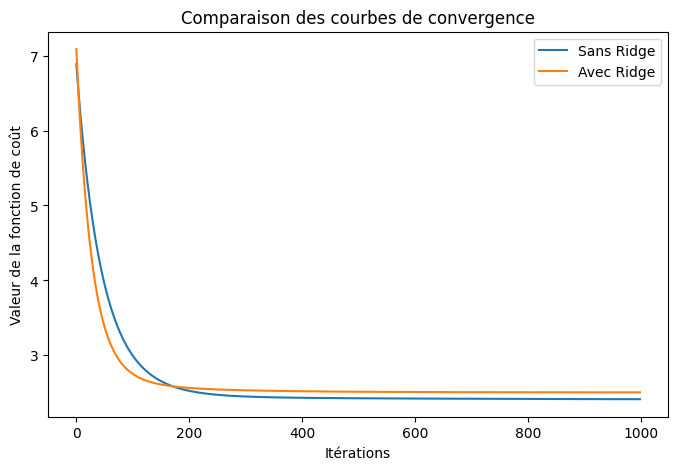

In [45]:
# Création de la figure
plt.figure(figsize=(8, 5))

# Courbe de convergence sans Ridge
plt.plot(cost_history, label="Sans Ridge")

# Courbe de convergence avec Ridge
plt.plot(cost_history_ridge, label="Avec Ridge")

# Titres et labels
plt.title("Comparaison des courbes de convergence")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction de coût")

# Légende
plt.legend()

# Affichage
plt.show()

### Interprétation des courbes de convergence

La comparaison des courbes de convergence met en évidence le compromis
biais–variance induit par la régularisation Ridge.

La figure compare l’évolution de la valeur de la fonction de coût en fonction du
nombre d’itérations pour la régression linéaire classique et la régression Ridge.
Dans les deux cas, la descente de gradient converge de manière stable, ce qui
confirme la validité de l’implémentation.

Le modèle sans régularisation atteint une valeur de coût plus faible, car il
cherche uniquement à minimiser l’erreur d’ajustement aux données. En revanche,
le modèle Ridge converge vers une valeur légèrement plus élevée en raison du
terme de pénalisation ajouté à la fonction de coût.

On observe également que la régularisation permet une convergence plus lisse
et mieux contrôlée, traduisant une meilleure stabilité du processus
d’optimisation.
